In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.backends.backend_agg as agg

In [12]:
probs = np.array([0.05, 0.35, 0.7, 0.75, 0.1, 0.1, 0.2, 0.3, 0.6, 0.1, ])
probs /= np.sum(probs)

history = np.array([0.15, 0.05, 0.32, 0.66, 0.23, 0.43, 0.12, 0.43, 0.54, 0.65, ])
history /= np.sum(history)

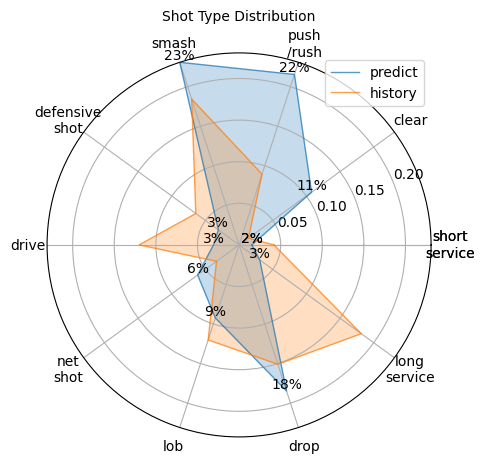

In [13]:
# Convert probabilities to radians for radar chart
angles = np.linspace(0, 2 * np.pi, len(probs), endpoint=False).tolist()

# make radar line close
angles.append(0)
probs = np.append(probs, probs[0])
history = np.append(history, history[0])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.99, top=0.9, wspace=0, hspace=0)

# Plot the probabilities using a radar chart
ax.plot(angles, probs, linewidth=1, alpha=0.75, label='predict')
ax.plot(angles, history,  linewidth=1, alpha=0.75, label='history')
ax.fill(angles, probs, alpha=0.25)
ax.fill(angles, history, alpha=0.25)


ax.legend(fontsize=10)
ax.set_title("Shot Type Distribution", fontsize=10)

# Set the x-axis tick labels to correspond to the events
events = ['short\nservice', 'clear', 'push\n/rush', 'smash', 'defensive\nshot', 'drive', 'net\nshot','lob', 'drop', 'long\nservice', 'short\nservice']
ax.set_xticks(angles)
ax.set_xticklabels(events)

# Set the radial axis range to match the maximum probability
ax.set_ylim(0, max(probs))

# Add the values on top of the data points
for angle, prob in zip(angles, probs):
    ax.text(angle, prob, f'{prob:.0%}', ha='center', va='bottom')

plt.show()